In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data=pd.read_excel('dataset/Fasle_Bahar_94_Pasargad.xls')

In [3]:
Y=data['Sum']
X=data[['Sesion','Month','DayOfNumber','DayOfWeek','OnOffDay','Hour']]

In [7]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=101)

In [8]:
from sklearn.svm import SVR

In [9]:
model = SVR(kernel='rbf')

In [10]:
model.fit(Xtrain,Ytrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
# print (scaler.mean_)

In [12]:
predictions = model.predict(Xtest)

In [13]:
from sklearn.metrics import r2_score

In [14]:
#print(metrics.precision_score(Ytest,predictions, average='macro'))
print(r2_score(Ytest, predictions,multioutput='variance_weighted'))

0.0625416260226


In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
dtree = DecisionTreeRegressor()

In [17]:
dtree.fit(Xtrain,Ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [18]:
treepredictop = dtree.predict(Xtest)

In [19]:
print(r2_score(Ytest,treepredictop))

0.98233554835


In [20]:
features = Xtrain.columns
features

Index(['Sesion', 'Month', 'DayOfNumber', 'DayOfWeek', 'OnOffDay', 'Hour'], dtype='object')

In [21]:
from IPython.display import Image  as image
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from PIL import Image

In [22]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

In [23]:

graph = pydot.graph_from_dot_data(dot_data.getvalue())

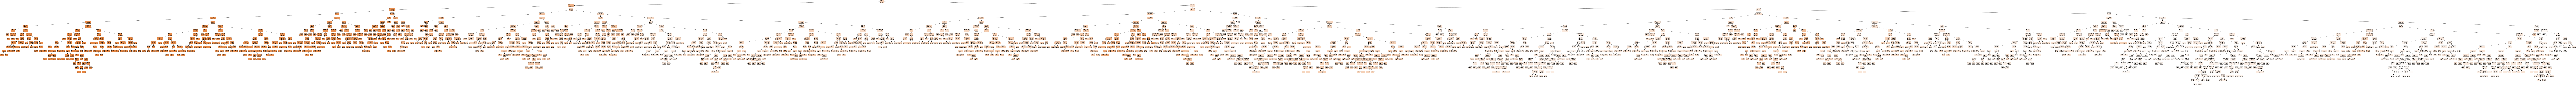

In [22]:
image(graph[0].create_png())

ValueError: Number of features of the model must match the input. Model n_features is 6 and input n_features is 1 

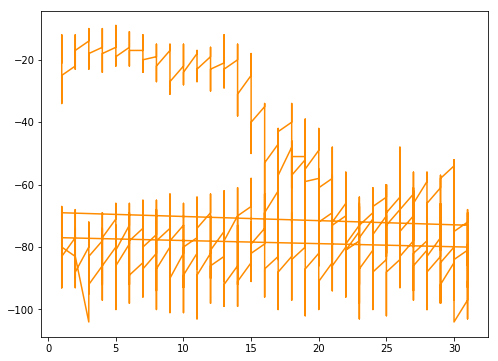

In [24]:
xx=np.array([np.linspace(0, 30, 100)]).T
plt.figure(figsize=(8,6))
# plt.scatter(X.values[:,2],Y,s=20,edgecolor="black",c="darkorange")
plt.plot(X.values[:,2],Y,color="darkorange")

# plt.plot(Xtest.values[:,2],Ytest,color="cornflowerblue",linewidth=2)
plt.plot(xx, dtree.predict(xx), linewidth=4, alpha=.7, label='prediction')
plt.xlabel("number of day")
plt.ylabel("sum")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

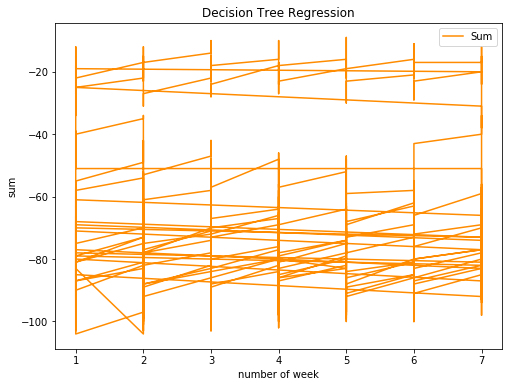

In [21]:
plt.figure(figsize=(8,6))
# plt.scatter(X.values[:,2],Y,s=20,edgecolor="black",c="darkorange")
plt.plot(X.values[:,3],Y,color="darkorange")

# plt.plot(Xtest.values[:,2],Ytest,color="cornflowerblue",linewidth=2)
plt.xlabel("number of week")
plt.ylabel("sum")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

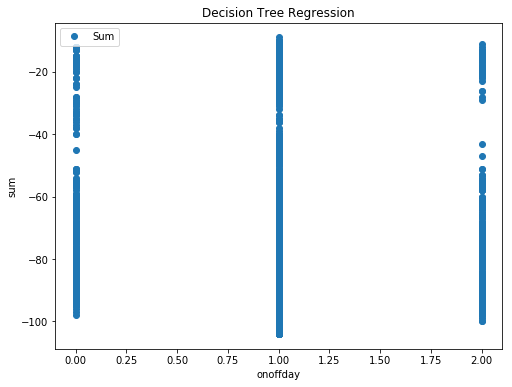

In [23]:
plt.figure(figsize=(8,6))
# plt.scatter(X.values[:,2],Y,s=20,edgecolor="black",c="darkorange")
plt.plot(X.values[:,4],Y,'o')

# plt.plot(Xtest.values[:,2],Ytest,color="cornflowerblue",linewidth=2)
plt.xlabel("onoffday")
plt.ylabel("sum")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

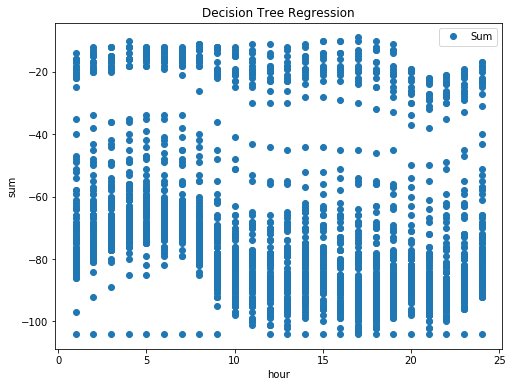

In [24]:
plt.figure(figsize=(8,6))
# plt.scatter(X.values[:,2],Y,s=20,edgecolor="black",c="darkorange")
plt.plot(X.values[:,5],Y, 'o')

# plt.plot(Xtest.values[:,2],Ytest,color="cornflowerblue",linewidth=2)
plt.xlabel("hour")
plt.ylabel("sum")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()